In [1]:
from pyspark.sql import SparkSession, SQLContext, DataFrame

In [2]:
spark = SparkSession.builder.master("spark://master:7077") \
    .appName('demo') \
    .config("spark.jars", "/tsi/target/scala-2.12/tsi_2.12-0.1.0.jar") \
    .getOrCreate()
sc = spark.sparkContext

In [3]:
from py4j.java_gateway import java_import
java_import(sc._gateway.jvm,"com.microsoft.tsi.*")
connector = sc._gateway.jvm.Connector()

In [4]:
jdf = connector.getDataFrame(spark._jsparkSession)
df = DataFrame(jdf, SQLContext(sc))
df.show()

+-----+---------+------------------+
|ts_id|timestamp|              temp|
+-----+---------+------------------+
|my_id|        0| 41.58396310415741|
|my_id|        1| 42.05680057540868|
|my_id|        2|  42.3642805527162|
|my_id|        3| 42.74057029990442|
|my_id|        4|  42.4513764225786|
|my_id|        5| 42.27967211226101|
|my_id|        6| 42.59418043963504|
|my_id|        7| 42.33008478977894|
|my_id|        8| 41.94677521606336|
|my_id|        9| 42.44328338549969|
|my_id|       10| 42.41895090404937|
|my_id|       11| 42.81162695599256|
|my_id|       12|42.829449499499546|
|my_id|       13| 43.02154968489285|
|my_id|       14| 43.03899552029519|
|my_id|       15| 43.21490570003236|
|my_id|       16|42.934010344315986|
|my_id|       17| 43.03701545321711|
|my_id|       18|43.028443718402386|
|my_id|       19| 43.01933469444577|
+-----+---------+------------------+
only showing top 20 rows



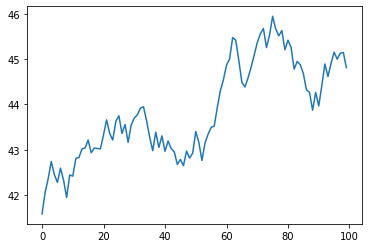

In [5]:
pdf = df.toPandas()
import matplotlib.pyplot as plt
_ = plt.plot(pdf['timestamp'], pdf['temp'])